## HW2 - Basics of ML
Include your code in the relevant cells below.
Subparts labeled as questions (Q1.1, Q1.2, etc.) should have their answers filled in or plots placed prominently, as appropriate.

### S1: Understanding the data
- Load MNIST Fashion training and testing datasets with reduced size (n6000 for training and n1000 for testing)
https://drive.google.com/drive/folders/10HpS26ZPhUXaJ8FrEMuUD01-aSjoTfC7?usp=sharing
- Visualize a few of the images to check the data and labels
- Normalize (scale) the data

Q1.1: What is the number of features in this dataset:   ___

Q1.2: What is the number of samples in this dataset:   ___

Q1.3: What is the dimensionality of each data sample: ___

In [1]:
pwd

'C:\\Users\\User\\MUSA\\project 1'

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from PIL import Image, ImageFilter, ImageOps
import matplotlib.pyplot as plt
import sklearn


## Hardcoded input args
train_data = 'C:\\Users\\User\\OneDrive\\Desktop\\Spring 2021\\MUSA\\fashion-mnist_train_n6000.csv'
test_data = 'C:\\Users\\User\\OneDrive\\Desktop\\Spring 2021\\MUSA\\fashion-mnist_test_n1000.csv'

df_train = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)

x_tr=df_train.iloc[:,1:].values
y_train=df_train.iloc[:,0].values
x_te=df_test.iloc[:,1:].values
y_test=df_test.iloc[:,0].values

categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
df_train.shape

(6000, 785)

Label Sandal


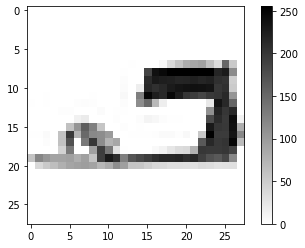

In [2]:
idx = 4000
Img = x_tr[idx].reshape(28,28)
Label = y_train[idx]

plt.imshow(Img, cmap=plt.cm.binary)
plt.colorbar()
print('Label ' + categories[Label])

In [3]:
df_train.shape

(6000, 785)

In [3]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_tr)
x_test = sc.fit_transform(x_te)

In [4]:
# Q1
print(f"Num of Features {df_train.shape[1]-1}")
print(f"Num of Samples (train + test): {df_train.shape[0] + df_test.shape[0]}")
print(f"Dimensionality: {df_train.shape[1]-1}")

Num of Features 784
Num of Samples (train + test): 7000
Dimensionality: 784


### S2: k-Nearest Neighbors
- Train a k-nearest neighbors classifier using the training data with k=5. 
- Apply the trained model to predict labels of test samples
- Repeat training/testing for k=1 to 20

Q2.1: Plot the testing accuracy with k

Q2.2: What is the prediction accuracy:   ___

Q2.3: What is the max prediction accuracy and optimal k:   ___

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
kclass= KNeighborsClassifier(n_neighbors=5)

kclass.fit(x_train,y_train)
y_pred=kclass.predict(x_test)
print(f"accuracy k=5: {accuracy_score(y_test,y_pred)}")

accuracy k=5: 0.827


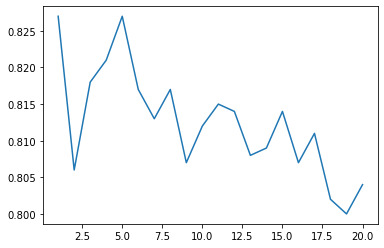

In [6]:
import array as arr
ks = arr.array('d',[])
acc =arr.array('d',[])

a=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for element in a:
    ks.append(element)
    kclass= KNeighborsClassifier(n_neighbors=element)
    kclass.fit(x_train,y_train)
    y_pred=kclass.predict(x_test)
    acc.append(accuracy_score(y_test,y_pred))

plt.plot(ks,acc)

In [7]:
#Q2.1 - 2.3
print(acc)
print(f"Max prediction accuracy: {max(acc)}")
print(f"optimal k: {np.argmax(acc)+1}")

array('d', [0.827, 0.806, 0.818, 0.821, 0.827, 0.817, 0.813, 0.817, 0.807, 0.812, 0.815, 0.814, 0.808, 0.809, 0.814, 0.807, 0.811, 0.802, 0.8, 0.804])
Max prediction accuracy: 0.827
optimal k: 1


### S3: k-NN Error Analysis
- Analyze the errors in classification for model with k=5 (hint: a "confusion matrix" may help to see them all together)

Q3.1: What is the label that was predicted with lowest accuracy:   ___

Q3.2: What is the label pair that was confused most often (i.e. class A is labeled as B, and vice versa):   ___

Q3.3: Visualize 5 mislabeled samples with their actual and predicted labels

In [8]:
from sklearn.metrics import confusion_matrix
kclass= KNeighborsClassifier(n_neighbors=5)

kclass.fit(x_train,y_train)
y_pred=kclass.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[83,  0,  1,  4,  2,  0,  8,  0,  2,  0],
       [ 2, 93,  1,  2,  0,  0,  2,  0,  0,  0],
       [ 2,  0, 77,  2,  7,  0, 12,  0,  0,  0],
       [ 4,  1,  1, 86,  6,  0,  2,  0,  0,  0],
       [ 0,  0,  9,  4, 79,  0,  7,  0,  1,  0],
       [ 1,  0,  1,  0,  0, 80,  0, 10,  0,  8],
       [13,  0, 18,  5,  8,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 95,  0,  4],
       [ 0,  0,  1,  0,  2,  0,  4,  2, 89,  2],
       [ 0,  0,  0,  0,  0,  0,  0, 11,  0, 89]], dtype=int64)

ANSWERS

Q3.1 Answer: Shirt (label 7 out of 10) was predicted with the lowest accuracy. Only 56 of the 100 pieces were labelled correctly 

Q3.2 Answer: Shirt (label 7) was incorrectly labelled as pullover (label 3) the most often. This happened 18 times. Pullover was incorrectly labelled as a shirt 12 times

Actual Label: Sandal
Predicted Label: Coat
Actual Label: Trouser
Predicted Label: Sneaker
Actual Label: Sneaker
Predicted Label: Sneaker
Actual Label: Sandal
Predicted Label: Dress
Actual Label: Dress
Predicted Label: Shirt


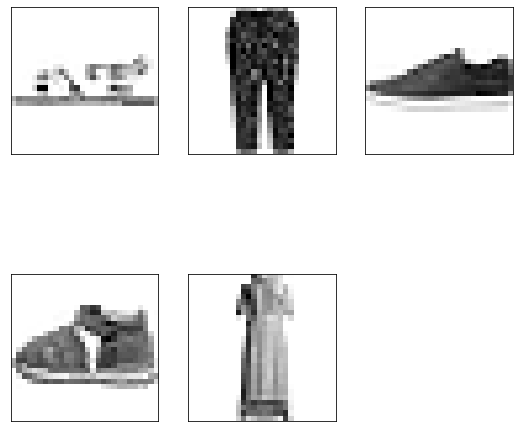

In [9]:
#Q3.3: visualizing 5 mislabeled samples with their actual and predicrted labels
e = np.where(y_test != y_pred)[0]

plt.figure(figsize=(9,9))

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_tr[e[i]].reshape(28,28), cmap=plt.cm.binary)
    print('Actual Label: ' + categories[y_train[e[i]]])
    print('Predicted Label: ' + categories[y_pred[e[i]]])
plt.tight_layout    
plt.show()



### S4: Support Vector Machines
- Train an SVM classifier using the default parameters. 
- Apply the trained model to predict the labels of test samples

Q4.1: What is the prediction accuracy:   ___

Q4.2: Which model performed best in your experiments so far:  ___

In [10]:
from sklearn import svm
svmC = svm.SVC(kernel=)
svmC.fit(x_train, y_train)
y_pred=svmC.predict(x_test)
print(f"SVM prediction accuracy: {accuracy_score(y_test,y_pred)} > highest K-NN prediction accuracy of 0.827")

SVM prediction accuracy: 0.844 > highest K-NN prediction accuracy of 0.827


### S5: Principal Component Analysis
- Apply PCA with n=30 components (on initial data without scaling)

Q5.1: Plot the variance ratio explained by principal components

Q5.2: What is the variance ratio explained by the first PCA component: ___

Q5.3: What is the total variance ratio explained by the first 5 PCA components: ___

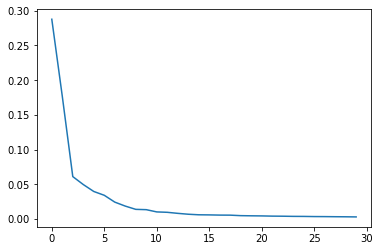

In [11]:
#Q5.1
from sklearn.decomposition import PCA
pca=PCA(n_components=30)
x_train_pca = pca.fit_transform(x_tr)
x_test_pca = pca.transform(x_te)
plt.plot(pca.explained_variance_ratio_)

In [12]:
#Q5.2
pca.explained_variance_ratio_[0]

0.2878053248783098

In [13]:
#Q5.3
np.cumsum(pca.explained_variance_ratio_)[4]

0.6148325269552017

In [14]:
#Q6.1
kclass= KNeighborsClassifier(n_neighbors=1)
pca=PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
kclass.fit(x_train_pca, y_train)
y_pred_pca=kclass.predict(x_test_pca)

print(f"accuracy with 5 components: {accuracy_score(y_test, y_pred_pca)}")

accuracy with 5 components: 0.679


In [15]:
#Q6.2
accuracy=[]

for i in range (1,41):
    pca = PCA(n_components= i)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    
    kclass.fit(x_train_pca, y_train)
    
    y_pred_pca=kclass.predict(x_test_pca)
    
    accscore = accuracy_score(y_test,y_pred_pca)
    
    print('Number of components: ' + str(i) + ' , accuracy: ' + str(accscore))
    
    accuracy.append(accscore)

print(f"max prediction accuracy: {max(accuracy)}")

Number of components: 1 , accuracy: 0.198
Number of components: 2 , accuracy: 0.457
Number of components: 3 , accuracy: 0.538
Number of components: 4 , accuracy: 0.62
Number of components: 5 , accuracy: 0.679
Number of components: 6 , accuracy: 0.693
Number of components: 7 , accuracy: 0.709
Number of components: 8 , accuracy: 0.724
Number of components: 9 , accuracy: 0.724
Number of components: 10 , accuracy: 0.728
Number of components: 11 , accuracy: 0.739
Number of components: 12 , accuracy: 0.737
Number of components: 13 , accuracy: 0.736
Number of components: 14 , accuracy: 0.75
Number of components: 15 , accuracy: 0.758
Number of components: 16 , accuracy: 0.763
Number of components: 17 , accuracy: 0.768
Number of components: 18 , accuracy: 0.767
Number of components: 19 , accuracy: 0.778
Number of components: 20 , accuracy: 0.78
Number of components: 21 , accuracy: 0.776
Number of components: 22 , accuracy: 0.787
Number of components: 23 , accuracy: 0.784
Number of components: 2

6.3 Answer: The results above shows that the increase in the accuracy from raising the number of components decreases as you add more components

### S7:
- Train an SVM model using the PCA coefficients with n=5 components (using default parameters of SVM)
- Apply the model on the PCA coefficients of test samples
- Repeat training/testing for number of PCA coefficients n=1 to 40

Q7.1: What is the prediction accuracy using only n=5 coefficients: ___

Q7.2: What is the max prediction accuracy using more coefficients: ___

In [16]:
#Q7.1
svmC = svm.SVC()
pca=PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
svmC.fit(x_train_pca, y_train)
y_pred_pca=svmC.predict(x_test_pca)

print(f"accuracy with 5 components: {accuracy_score(y_test, y_pred_pca)}")

accuracy with 5 components: 0.718


In [17]:
#7.2
accuracy=[]

for i in range (1,41):
    pca = PCA(n_components= i)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    
    svmC.fit(x_train_pca, y_train)
    
    y_pred_pca=svmC.predict(x_test_pca)
    
    accscore = accuracy_score(y_test,y_pred_pca)
    
    print('Number of components: ' + str(i) + ' , accuracy: ' + str(accscore))
    
    accuracy.append(accscore)

print(f"max prediction accuracy: {max(accuracy)}")

Number of components: 1 , accuracy: 0.298
Number of components: 2 , accuracy: 0.52
Number of components: 3 , accuracy: 0.608
Number of components: 4 , accuracy: 0.696
Number of components: 5 , accuracy: 0.718
Number of components: 6 , accuracy: 0.748
Number of components: 7 , accuracy: 0.749
Number of components: 8 , accuracy: 0.759
Number of components: 9 , accuracy: 0.757
Number of components: 10 , accuracy: 0.773
Number of components: 11 , accuracy: 0.786
Number of components: 12 , accuracy: 0.789
Number of components: 13 , accuracy: 0.786
Number of components: 14 , accuracy: 0.789
Number of components: 15 , accuracy: 0.797
Number of components: 16 , accuracy: 0.8
Number of components: 17 , accuracy: 0.806
Number of components: 18 , accuracy: 0.801
Number of components: 19 , accuracy: 0.813
Number of components: 20 , accuracy: 0.815
Number of components: 21 , accuracy: 0.816
Number of components: 22 , accuracy: 0.814
Number of components: 23 , accuracy: 0.812
Number of components: 2

### :S8
- Create a new feature vector for each image by selecting n random pixels from each image (instead of a PCA transform)
- Run the k-NN with the optimal k from S2, as you did in S6, using these random pixel features.
- Train an SVM using default parameters, as you did in S7, using these random pixel features.

Q8.1: What is the prediction accuracy using only n=5 features: ___

Q8.2: What is the prediction accuracy using n=30 features: ___

Q8.3: What is the prediction accuracy using n=60 features: ___

Q8.4: Comment on the results. Is random selection of pixels an acceptable approach? Why or why not: ___

In [18]:
import random
random.seed(17)
def feature_vector(n):
    f = random.sample(range(0, 784), n)
    kclass= KNeighborsClassifier(n_neighbors=1)
    kclass.fit(x_train[:,f],y_train)
    y_pred_r=kclass.predict(x_test[:,f])
    print(f"k-NN accuracy n={n}: {accuracy_score(y_test, y_pred_r)}")
def feature_vector_s(n):
    f = random.sample(range(0, 784), n)
    svmC.fit(x_train[:,f],y_train)
    y_pred_r=svmC.predict(x_test[:,f])
    print(f"SVM accuracy n={n}: {accuracy_score(y_test, y_pred_r)}")

In [19]:
#Q8.1 - 8.3
feature_vector(5)
feature_vector(30)
feature_vector(60)
feature_vector_s(5)
feature_vector_s(30)
feature_vector_s(60)

k-NN accuracy n=5: 0.321
k-NN accuracy n=30: 0.697
k-NN accuracy n=60: 0.734
SVM accuracy n=5: 0.448
SVM accuracy n=30: 0.736
SVM accuracy n=60: 0.785


ANSWER
Q8.4: The random selection is not a great approach relative to the pca approach. The accuracy really depends on having a larger amount of features and not finding the best combination of features like the pca. For example, with only 5 components, the PCA transformed data using the K Neighbours Classifier had an accuracy of 0.679 compared to 0.321 for the random selection. With only 40 components, the PCA transformed data using the SVM model has an accuracy of 0.827, whereas even with 60 random features, the accuracy using the SVM model was only 0.785, showing how much better the PCA coefficients are than the random selection of features.